In [295]:
import pandas as pd
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Step 1: Data Gathering

In [19]:
wine_data = pd.read_csv('redwine_quality.csv')
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Rename the column names 

In [20]:

wine_dataa = wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid',
                         'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
wine_dataa.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [21]:
wine_dataa.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Data Cleaning and Exploration using Pandas

#### It is important to note that the data has 240 duplicated rows, so I would not remove these values because i want to believe the data gotten was from different unique wine tasters. 

##### Can be checked using Pandas Profiling


In [22]:
wine_dataa['pH'].unique()


array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [23]:
wine_dataa.count()

fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

### Check for null values if any

In [24]:
wine_dataa.info()
wine_dataa.isnull().any() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [25]:
wine_dataa.describe() 

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Explore features in the dataset


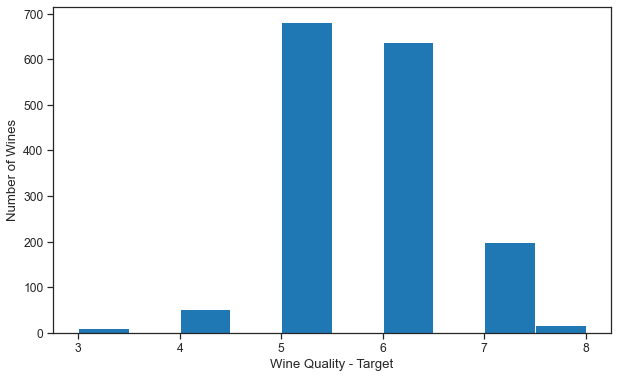

In [26]:
plt.figure(figsize=(10,6))
plt.hist(wine_dataa['quality'])
plt.xlabel('Wine Quality - Target')
plt.ylabel('Number of Wines')
plt.show()



In [27]:
wine_dataa['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

## Correlation

## $$\rho _{XY} = corr(X,Y)$$

## $$ -1.0 \leq \rho _(XY) \leq +1.0 $$



In [162]:
wine_dataa.corr().quality.sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
label                   0.848279
quality                 1.000000
Name: quality, dtype: float64

In [163]:
zeromask = np.zeros_like(wine_dataa.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True

zeromask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

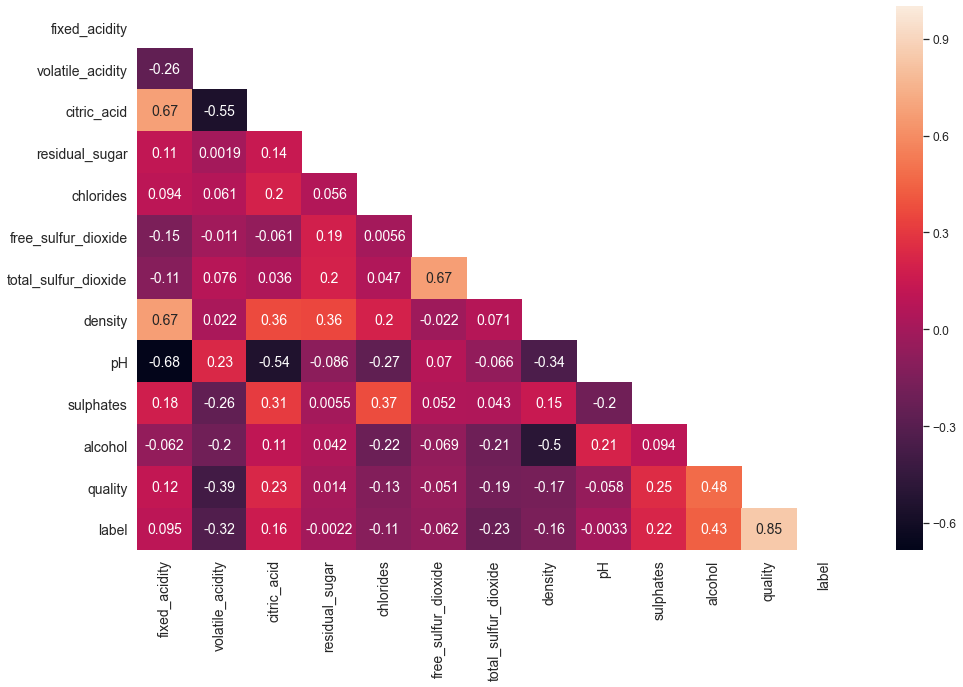

In [165]:
plt.figure(figsize=(16,10))
sns.heatmap(wine_dataa.corr(), mask=zeromask, annot=True, annot_kws={'size': 14})
sns.set_style('whitegrid')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

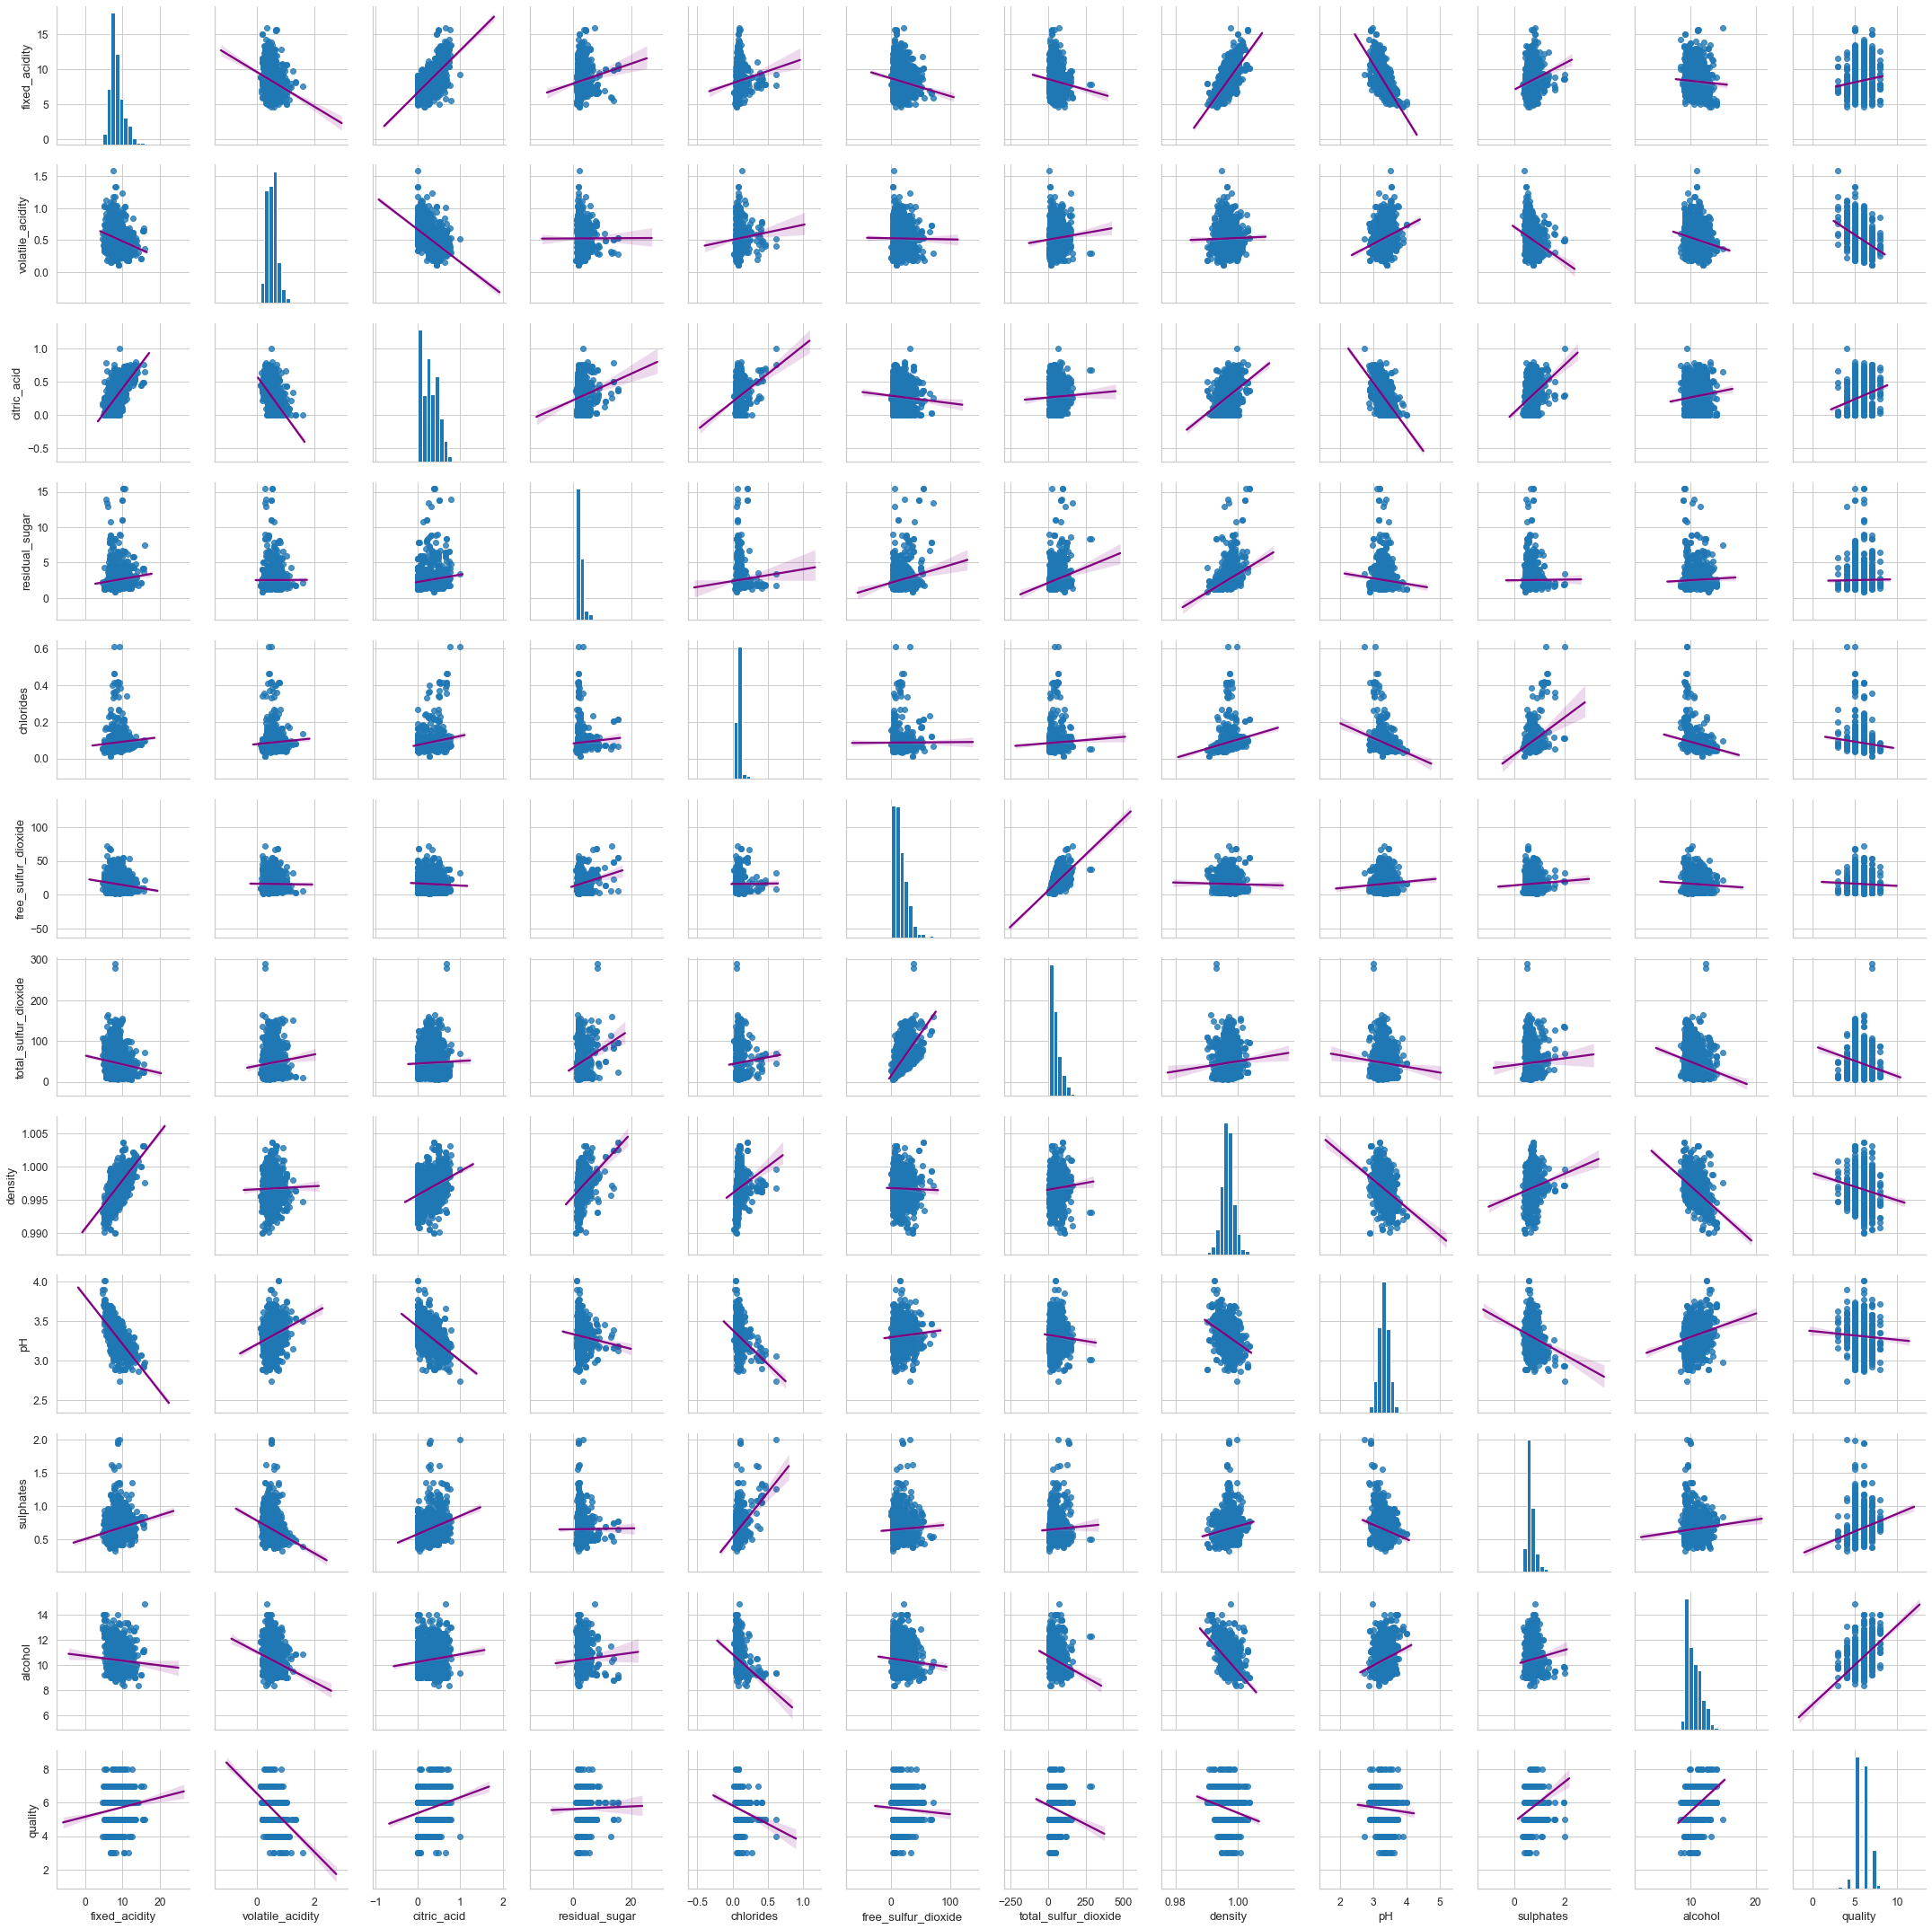

In [31]:
#%%time

sns.pairplot(wine_dataa, kind='reg', plot_kws={'line_kws':{'color':'purple'}})
plt.show()

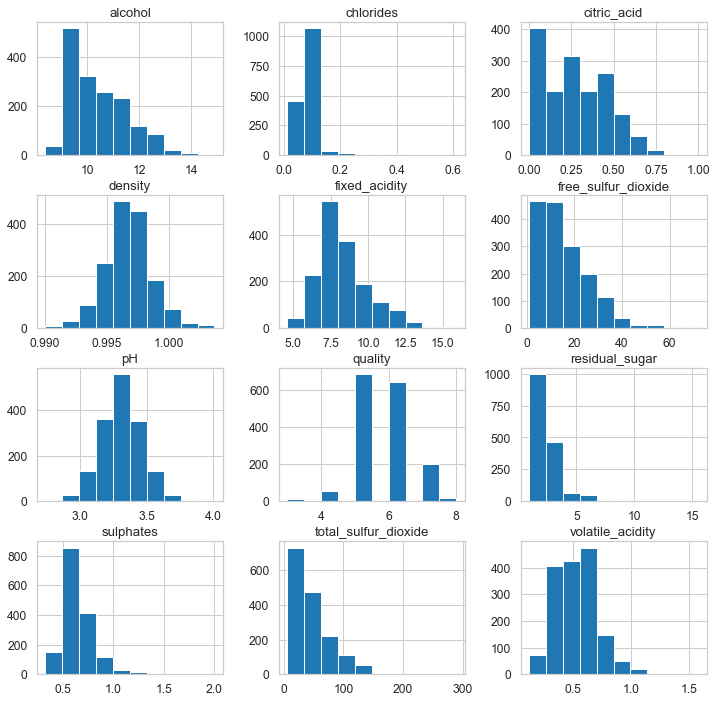

In [32]:
wine_dataa.hist(figsize=(12,12))
plt.show()

In [33]:
quality = wine_dataa['quality']
features = wine_dataa.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, quality, test_size=0.2, random_state = 10)

#% of training set
print('Train: ', len(X_train)/len(features))

# % of test data
X_test.shape[0]/features.shape[0]

Train:  0.7998749218261413


0.20012507817385866

## Training and Test Dataset Split

In [34]:


quality = wine_dataa['quality']
features = wine_dataa.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, quality, test_size=0.2, random_state = 10)

#% of training set
print('Train: ', len(X_train)/len(features))

# % of test data
X_test.shape[0]/features.shape[0]

Train:  0.7998749218261413


0.20012507817385866

## Multivariable Regression

In [35]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']) 

Training data r-squared: 0.35327685943218795
Test data r-squared: 0.3707576574165531
Intercept 11.080641832601424


coef
fixed_acidity         0.021392
volatile_acidity     -1.243804
citric_acid          -0.270301
residual_sugar        0.001107
chlorides            -1.763507
free_sulfur_dioxide   0.002982
total_sulfur_dioxide -0.003355
density              -6.774054
pH                   -0.374120
sulphates             0.826384
alcohol               0.269015

## Data Transformation

In [36]:
wine_dataa['quality'].skew()


0.21780157547366327

## p-values and Evaluating Coefficients

In [37]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

coef  p values
const                 11.080642     0.635
fixed_acidity          0.021392     0.462
volatile_acidity      -1.243804     0.000
citric_acid           -0.270301     0.107
residual_sugar         0.001107     0.947
chlorides             -1.763507     0.000
free_sulfur_dioxide    0.002982     0.218
total_sulfur_dioxide  -0.003355     0.000
density               -6.774054     0.776
pH                    -0.374120     0.079
sulphates              0.826384     0.000
alcohol                0.269015     0.000

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     62.92
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          9.11e-112
Time:                        11:28:30   Log-Likelihood:                -1244.6
No. Observations:                1279   AIC:                             2513.
Df Residuals:                    1267   BIC:                             2575.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.0806 

## Equation

### $$ Quality = 11.1 + 0.27Alcohol -1.76Chlorides -0.27Citric Acid - 6.77Density + 0.02Fixed Acidity + 0.0029Free Sulfur Dioxide - 0.37pH + 0.001Residual Sugar + 0.83Sulphates - 0.003Total Sulfur Dioxide - 1.24Volatile Acidity $$


## Testing for Multicollinearity

$$ FA = \alpha _0 + \alpha _1 VA + \alpha _2 CA +...+ \alpha _{10}ALCOHOL $$

$$ VIF _{FA} = \frac{1}{(1-R _{FA} ^ 2)} $$

In [39]:
#X_incl_const.shape[1]

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]  #empty list

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

coef_name         vif
0                  const  1684414.66
1          fixed_acidity        7.73
2       volatile_acidity        1.79
3            citric_acid        3.21
4         residual_sugar        1.69
5              chlorides        1.54
6    free_sulfur_dioxide        1.96
7   total_sulfur_dioxide        2.21
8                density        6.14
9                     pH        3.23
10             sulphates        1.46
11               alcohol        2.92

## Model Simplification and Bayesian Information Criterion

In [40]:
X_incl_const = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_incl_const) 
results = model.fit() 

org_coef = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 2575.1412744720833
r-squared is 0.353276859432188


In [41]:
#X_incl_const
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['fixed_acidity', 'residual_sugar'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit() 

coef_minus_fix_res = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 2561.4628910844963
r-squared is 0.35295858515659684


In [42]:
X_incl_const = sm.add_constant(X_train) 
X_incl_const = X_incl_const.drop(['fixed_acidity', 'residual_sugar', 'citric_acid', 'free_sulfur_dioxide'], axis=1) #Dropping the INDUS column(axis = 1)

model = sm.OLS(y_train, X_incl_const) 
results = model.fit() 

coef_minus_fix_res_cit_free = pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 2551.4884511290643
r-squared is 0.35076270346058236


In [43]:
frame = [org_coef, coef_minus_fix_res, coef_minus_fix_res_cit_free]
pd.concat(frame, axis=1, sort=True)

coef  p values      coef  p values      coef  \
alcohol                0.269015     0.000  0.278339     0.000  0.264971   
chlorides             -1.763507     0.000 -1.856642     0.000 -1.969408   
citric_acid           -0.270301     0.107 -0.223568     0.154       NaN   
const                 11.080642     0.635 -0.464288     0.972  8.603131   
density               -6.774054     0.776  5.266434     0.688 -4.177663   
fixed_acidity          0.021392     0.462       NaN       NaN       NaN   
free_sulfur_dioxide    0.002982     0.218  0.003123     0.193       NaN   
pH                    -0.374120     0.079 -0.485195     0.001 -0.362404   
residual_sugar         0.001107     0.947       NaN       NaN       NaN   
sulphates              0.826384     0.000  0.816533     0.000  0.820180   
total_sulfur_dioxide  -0.003355     0.000 -0.003540     0.000 -0.002958   
volatile_acidity      -1.243804     0.000 -1.237719     0.000 -1.146731   

                      p values  
alcohol                  0.000  
chlorides                0.000  
citric_acid                NaN  
const                    0.462  
density                  0.717  
fixed_acidity              NaN  
free_sulfur_dioxide        NaN  
pH                       0.007  
residual_sugar             NaN  
sulphates                0.000  
total_sulfur_dioxide     0.000  
volatile_acidity         0.000

## Distribution of Residuals - checking for normality

### Remember a normal distribution has a skew and mean of 0

The mean of the residuals -0.0
The skew of the residuals -0.147


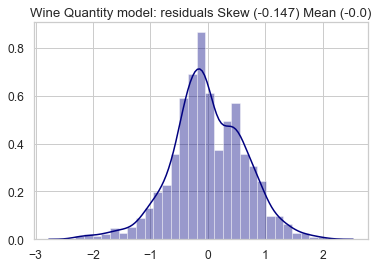

In [44]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

print('The mean of the residuals', resid_mean)
print('The skew of the residuals', resid_skew)

sns.distplot(results.resid, color='navy')
plt.title(f'Wine Quantity model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [45]:
full_normal_mse = round(results.mse_resid, 3)
full_normal_rmse = round(np.sqrt(full_normal_mse))
full_normal_rsquared = round(results.rsquared, 3)

print("Full Normal Mean Square Error", full_normal_mse)
print("Full Normal Root Mean Square Error", full_normal_rmse)
print("Full Normal R-Squared", full_normal_rsquared)



Full Normal Mean Square Error 0.414
Full Normal Root Mean Square Error 1.0
Full Normal R-Squared 0.351


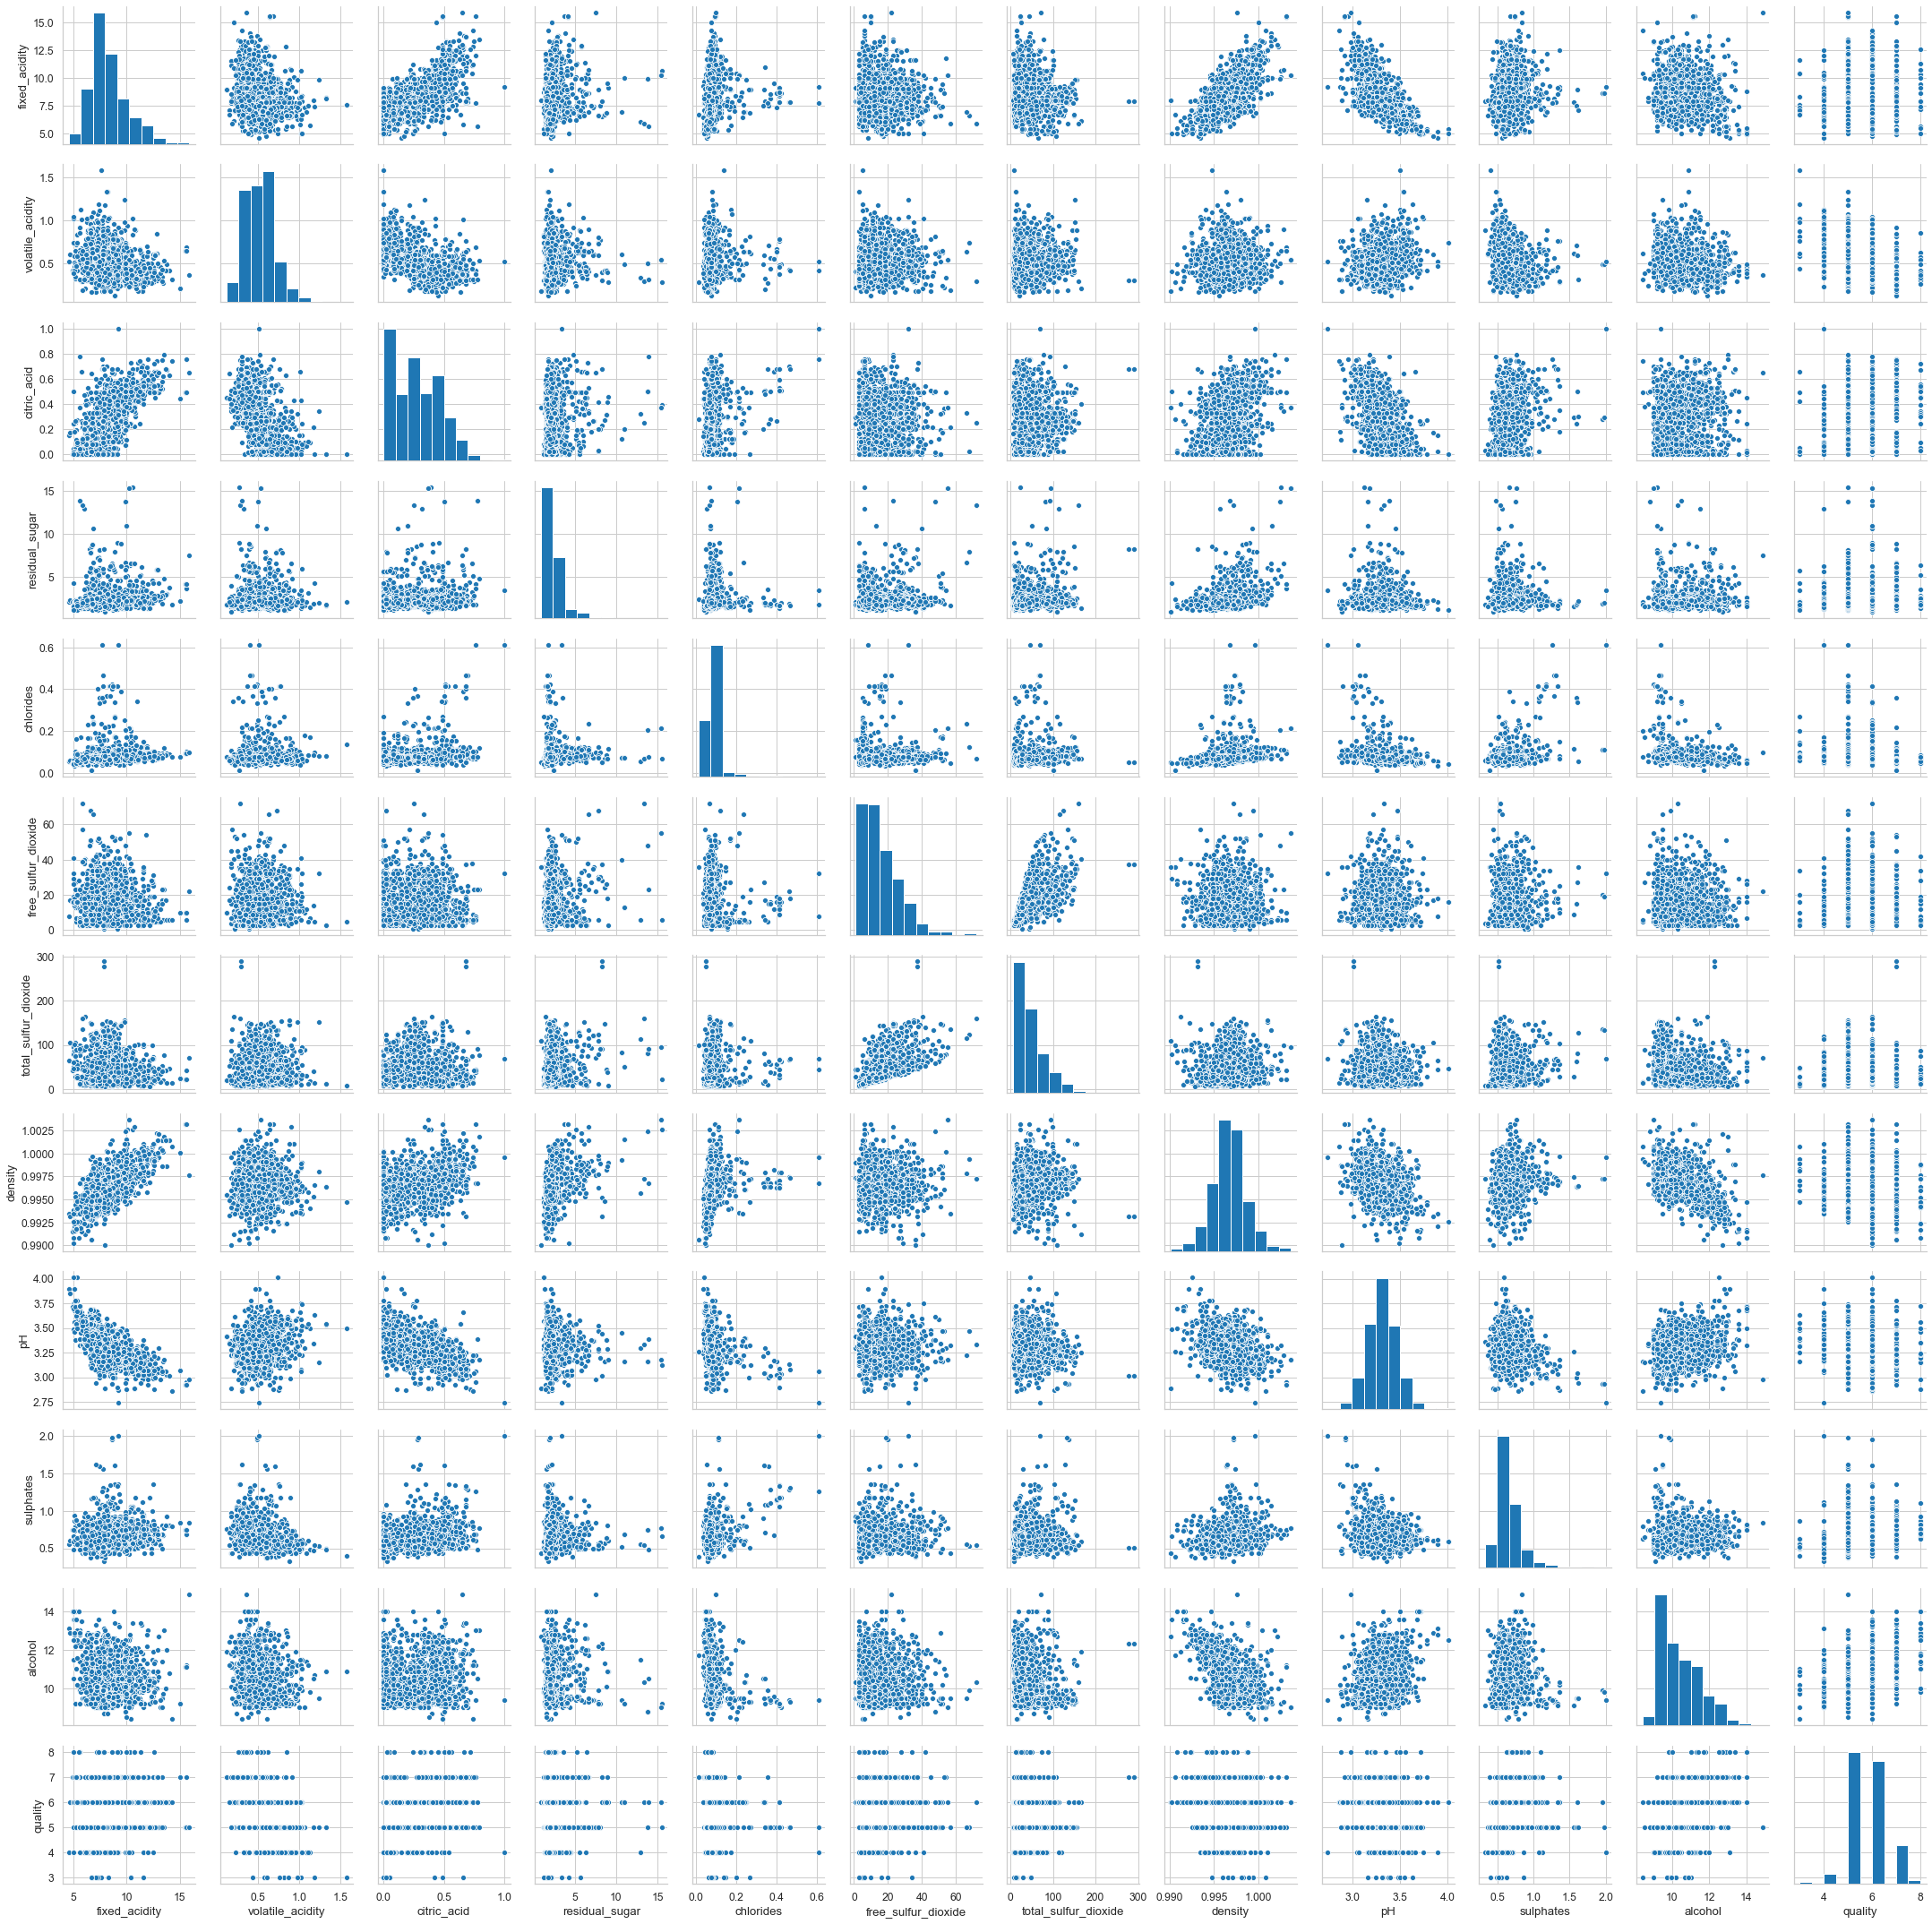

In [46]:
sns.pairplot(wine_dataa)
plt.show()

### It can be seen that the Target output (Quality) against other features will not plot a perfect fit line hence we should consider using a classification algorithm


### Random Forest Classification Algorithm

In [47]:
# Let us analyze our target output more 

wine_dataa.quality.unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

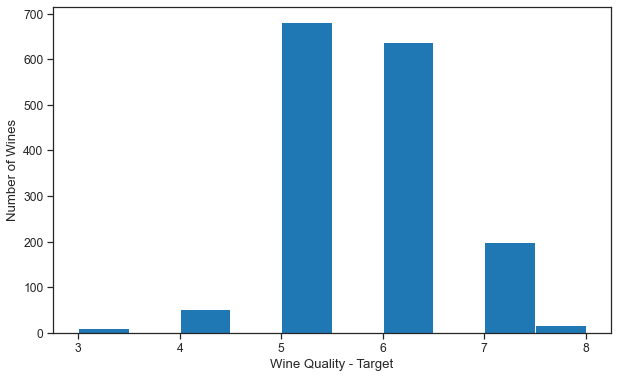

In [26]:
plt.figure(figsize=(10,6))
plt.hist(wine_dataa['quality'])
plt.xlabel('Wine Quality - Target')
plt.ylabel('Number of Wines')
plt.show()



### The output shows that we can classify it based on its unique range of  wine quality



#### Quality $\leq$ 4 : Table Wine or 0  (3-4)
#### Quality $\geq$  7 : Fine Wine or 2 (7-8)
#### Else : Premium Wine or 1 (5-6)


In [204]:
wine_table = []

for i in wine_dataa.quality:
    if i <= 4:
        wine_table.append(0) #Table Wine
    elif i >= 7:
        wine_table.append(2) #Fine Wine
    else:
        wine_table.append(1) #Premium Wine
        
wine_dataa['label'] = wine_table
wine_dataa[:20]
        

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36             6.1      0.071   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29             1.6      0.114   
14            8.9             0.620         0.18             3.8      0.176   
15            8.9             0.620         0.19             3.9      0.170   
16            8.5             0.280         0.56             1.8      0.092   
17            8.1             0.560         0.28             1.7      0.368   
18            7.4             0.590         0.08             4.4      0.086   
19            7.9             0.320         0.51             1.8      0.341   

    free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
4                  11.0                  34.0   0.9978  3.51       0.56   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   
11                 17.0                 102.0   0.9978  3.35       0.80   
12                 16.0                  59.0   0.9943  3.58       0.52   
13                  9.0                  29.0   0.9974  3.26       1.56   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
16                 35.0                 103.0   0.9969  3.30       0.75   
17                 16.0                  56.0   0.9968  3.11       1.28   
18                  6.0                  29.0   0.9974  3.38       0.50   
19                 17.0                  56.0   0.9969  3.04       1.08   

    alcohol  quality  label  
0       9.4        5      1  
1       9.8        5      1  
2       9.8        5      1  
3       9.8        6      1  
4       9.4        5      1  
5       9.4        5      1  
6       9.4        5      1  
7      10.0        7      2  
8       9.5        7      2  
9      10.5        5      1  
10      9.2        5      1  
11     10.5        5      1  
12      9.9        5      1  
13      9.1        5      1  
14      9.2        5      1  
15      9.2        5      1  
16     10.5        7      2  
17      9.3        5      1  
18      9.0        4      0  
19      9.2        6      1

In [280]:
# Import train_test_split function

X=wine_dataa.drop(['label','quality'], axis=1)# Features
y=wine_dataa['label']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rfc.fit(X_train,y_train)

#Perform prediction on the test set
y_pred=rfc.predict(X_test)

randomstate is basically used for reproducing your problem the same every time it is run. If you do not use a randomstate in traintestsplit, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.


# After training, check the accuracy using actual and predicted values.

In [302]:
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?


print("Classification Report:",classification_report(y_test, y_pred))
print("Confusion Metrics :",confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', metrics.precision_score(y_test, y_pred, average="micro"))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.06      0.11        18
           1       0.88      0.95      0.92       395
           2       0.64      0.52      0.57        67

    accuracy                           0.86       480
   macro avg       0.84      0.51      0.53       480
weighted avg       0.85      0.86      0.84       480

Confusion Metrics : [[  1  17   0]
 [  0 375  20]
 [  0  32  35]]
F1 Score:  0.85625
Precision Score: 0.85625
Accuracy:  0.85625


In [293]:
y_test
y_pred

df = pd.DataFrame(list(zip(y_test, y_pred)), 
               columns =['Y_test', 'Y_pred']) 
df[:20]

Y_test  Y_pred
0        1       1
1        1       1
2        1       1
3        1       1
4        1       1
5        1       1
6        1       1
7        1       1
8        1       1
9        1       1
10       2       1
11       0       1
12       1       1
13       1       1
14       1       1
15       2       2
16       1       1
17       2       1
18       2       2
19       1       1

In [217]:
wine_dataa.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  label  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

In [219]:
#to select all the features excluding the wine quality and labels
wine_dataa1 = wine_dataa.iloc[:, 0:11].copy() # To avoid the case where changing wine_dataa1 also changes wine_dataa
wine_dataa1

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

### Finding Important Features in Scikit-learn
### Here, you are finding important features or selecting features in the Red Wine dataset. In scikit-learn, you can perform this task in the following steps:

First, you need to create a random forests model.
Second, use the feature importance variable to see feature importance scores.
Third, visualize these scores using the seaborn library.


In [212]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfcc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfcc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
importance = rfcc.feature_importances_
feature_imp = pd.Series(importance, index=wine_dataa1.columns).sort_values(ascending=False)
feature_imp


alcohol                 0.161512
volatile_acidity        0.119033
sulphates               0.116509
density                 0.092026
total_sulfur_dioxide    0.088735
citric_acid             0.077903
chlorides               0.075699
fixed_acidity           0.074563
residual_sugar          0.073350
pH                      0.061621
free_sulfur_dioxide     0.059050
dtype: float64

No handles with labels found to put in legend.


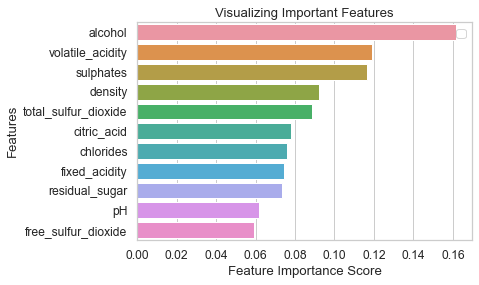

In [224]:
# Visualize the Importance Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the Model on Selected Features
Here, you can remove the "free sulfur dioxide" feature because it has very low importance, and select the 10 remaining features.

In [284]:

# Split dataset into features and labels


Xs=wine_dataa.drop(['label', 'quality', 'free_sulfur_dioxide', 'pH', 'residual_sugar'], axis=1) # Removed feature "free_sulfur_dioxide"
ys=wine_dataa['label']                                       
# Split dataset into training set and test set
X_trainn, X_testt, y_trainn, y_testt = train_test_split(Xs, ys, test_size=0.30, random_state=42) # 70% training and 30% test

In [285]:
#Create a Gaussian Classifier
rfccc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfccc.fit(X_trainn,y_trainn)

# prediction on test set
y_predd=rfccc.predict(X_testt)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testt, y_predd))

Accuracy: 0.84375
